In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
print("Libraries imported!")

Libraries imported!


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('Training_Data_16k.csv')
print("Data loaded!")

Data loaded!


In [4]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

continuouos_features = ['Elevation_30m.tif', 'Slope_30m.tif', 'Curvature_30m.tif', 'Dis2stream_30m.tif', 'Dis2Roads_30m.tif',
                        'Rainfall_30m.tif', 'Stream_Density_30m.tif', 'SPI_30m.tif','TWI_30m.tif'
]

categorical_features = ['LULC_30m.tif', 'Geomorphology_30m.tif', 'Lithology_30m.tif', 'Soil_30m.tif'
]

circular_feature = 'Aspect_30m.tif'

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

print("\nClass distribution:")
print(y.value_counts()) #counts how many 0 and 1 classes
print("\nClass proportions:")
print(y.value_counts(normalize=True)) #gives a % of 0 and 1 classes

Dataset Shape: (16000, 15)

First few rows:
   class  Aspect_30m.tif  Curvature_30m.tif  Dis2Roads_30m.tif  \
0      0       59.036243          -0.111111         247.386337   
1      0      315.000000           0.000000        1290.000000   
2      1      116.565048          -0.222222        7122.836426   
3      1       45.000000           0.444444        1018.675598   
4      1      123.690071          -0.555556        2621.011230   

   Dis2stream_30m.tif  Elevation_30m.tif  Geomorphology_30m.tif  \
0          510.881592                 43                      1   
1          918.313660                 45                      2   
2         2002.598267                 37                      3   
3          210.000000                 39                      2   
4          954.829834                 38                      1   

   Lithology_30m.tif  LULC_30m.tif  Rainfall_30m.tif  Slope_30m.tif  \
0                  2             5       1180.459351       7.307570   
1             

In [5]:
# Replace special values with NaN
X_clean = X.replace([-128, -1, 'NA', 65535], np.nan)
X_clean = X_clean.apply(pd.to_numeric, errors='coerce')

print("\nMissing values after cleaning:")
print(X_clean.isnull().sum())

# Remove rows with missing values
mask = ~X_clean.isnull().any(axis=1)
X_clean = X_clean[mask]
y_clean = y[mask]

print(f"\nRows after removing missing values: {len(X_clean)}")
print(f"Rows removed: {len(df) - len(X_clean)}")



Missing values after cleaning:
Aspect_30m.tif            759
Curvature_30m.tif          63
Dis2Roads_30m.tif          12
Dis2stream_30m.tif         12
Elevation_30m.tif           8
Geomorphology_30m.tif       0
Lithology_30m.tif           0
LULC_30m.tif                0
Rainfall_30m.tif            9
Slope_30m.tif             166
Soil_30m.tif              196
SPI_30m.tif                78
Stream_Density_30m.tif     12
TWI_30m.tif               166
dtype: int64

Rows after removing missing values: 14930
Rows removed: 1070


In [6]:
#display of categorical features
for cat_feat in categorical_features:
    print(f"\n{cat_feat}:")
    print(X_clean[cat_feat].value_counts().sort_index())
    print(f"Number of unique categories: {X_clean[cat_feat].nunique()}")



LULC_30m.tif:
LULC_30m.tif
1      634
2      256
3        8
4       48
5    11654
6      396
7     1692
8      242
Name: count, dtype: int64
Number of unique categories: 8

Geomorphology_30m.tif:
Geomorphology_30m.tif
1    9530
2    2626
3    2323
4      40
5      11
6     400
Name: count, dtype: int64
Number of unique categories: 6

Lithology_30m.tif:
Lithology_30m.tif
1    11838
2      212
3      243
4     2610
5       27
Name: count, dtype: int64
Number of unique categories: 5

Soil_30m.tif:
Soil_30m.tif
3682.0    2677
3695.0    3935
3743.0    1989
3808.0    6329
Name: count, dtype: int64
Number of unique categories: 4


In [7]:
#continuous features 
X_continuous = X_clean[continuouos_features].copy() #copy in order not to mess up original

scaler_standard = StandardScaler()  #z-score scaling z=(x-mean)/std, mean = 0 and standard deviation = 1
X_continuous_scaled = pd.DataFrame(
    scaler_standard.fit_transform(X_continuous),  #finds mean and std of a column and scale it 
    columns=continuouos_features,
    index=X_clean.index
)

print("Continuouos features normalized (Z-score)")
print("Mean:", X_continuous_scaled.mean().round(6).values[:3], "...") #mean, rounded on 6 dec. points, shows 3 results
                                                                      #numbers should be ~0      
print("Std:", X_continuous_scaled.std().round(6).values[:3], "...")  #standard deviation -> numbers should be ~1


Continuouos features normalized (Z-score)
Mean: [-0.  0. -0.] ...
Std: [1.000033 1.000033 1.000033] ...


In [ ]:
#categorical data
X_categorical = X_clean[categorical_features].copy()

for col in categorical_features:
    X_categorical[col] = X_categorical[col].astype(str)

X_categorical_encoded = pd.get_dummies(
    X_categorical, 
    columns=categorical_features,
    drop_first=True,  #"dummy variable trap"
    prefix=categorical_features
)
#it separates types in each column into unique columns, so that column does not have values 1-6, but 0/1
#example soil has types 1,2,3. New columns: Soil_1, Soil_2, Soil_3 and each will have values 0/1 for each row

print(f"Number of columns before encoding: {len(categorical_features)}")
print(f"Number of columns after encoding: {X_categorical_encoded.shape[1]}")
print("\nNew columns(first 10):")
print(X_categorical_encoded.columns.tolist()[:10])

Number of columns before encoding: 4
Number of columns after encoding: 19

New columns(first 10):
['LULC_30m.tif_2', 'LULC_30m.tif_3', 'LULC_30m.tif_4', 'LULC_30m.tif_5', 'LULC_30m.tif_6', 'LULC_30m.tif_7', 'LULC_30m.tif_8', 'Geomorphology_30m.tif_2', 'Geomorphology_30m.tif_3', 'Geomorphology_30m.tif_4']


In [9]:
#circular data - left in degrees
aspect_values = X_clean[circular_feature].copy()

# Sin/Cos transformation (without conversion)
X_circular = pd.DataFrame({
    'Aspect_sin': np.sin(aspect_values),
    'Aspect_cos': np.cos(aspect_values)
}, index=X_clean.index)


In [10]:
#connecting all the processed features
X_processed = pd.concat([
    X_continuous_scaled,      # Normalized continuous
    X_categorical_encoded,    # One-hot encoded categorical
    X_circular               # Sin/Cos transformed aspect
], axis=1)

print(f"\nFINAL dataset shape: {X_processed.shape}")
print(f"Sum of features: {X_processed.shape[1]}")
print(f"  - Continuous: {len(continuouos_features)}")
print(f"  - Categorical (encoded): {X_categorical_encoded.shape[1]}")
print(f"  - Circular: 2 (sin + cos)")


FINAL dataset shape: (14930, 30)
Sum of features: 30
  - Continuous: 9
  - Categorical (encoded): 19
  - Circular: 2 (sin + cos)


In [11]:
#save all data and separate features
X_processed.to_csv('data_processed_proper.csv', index=False)
y_clean.to_csv('target_clean.csv', index=False)

X_continuous_scaled.to_csv('data_continuous_normalized.csv', index=False)
X_categorical_encoded.to_csv('data_categorical_encoded.csv', index=False)
X_circular.to_csv('data_circular_transformed.csv', index=False)

print(f"\nNaN values in final dataset: {X_processed.isnull().sum().sum()}")


NaN values in final dataset: 0



Saved: continuous_features_normalization.png
Saved: categorical_features_distribution.png
Saved: aspect_circular_transformation.png


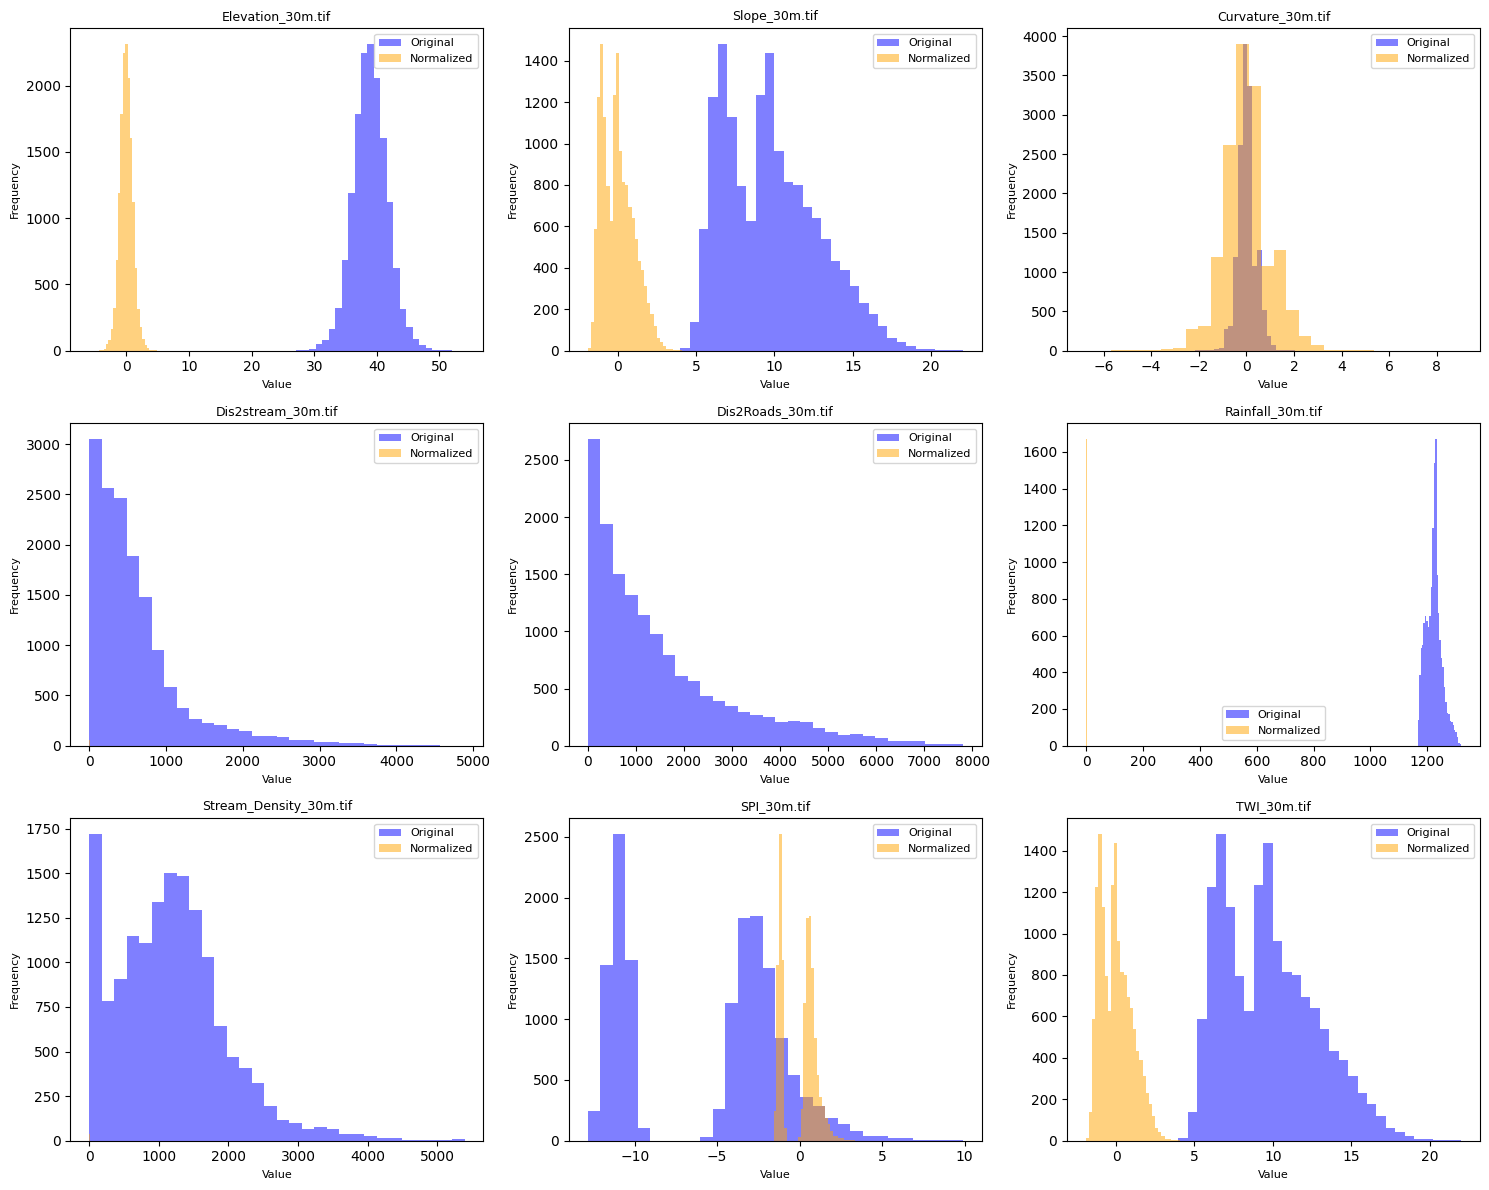

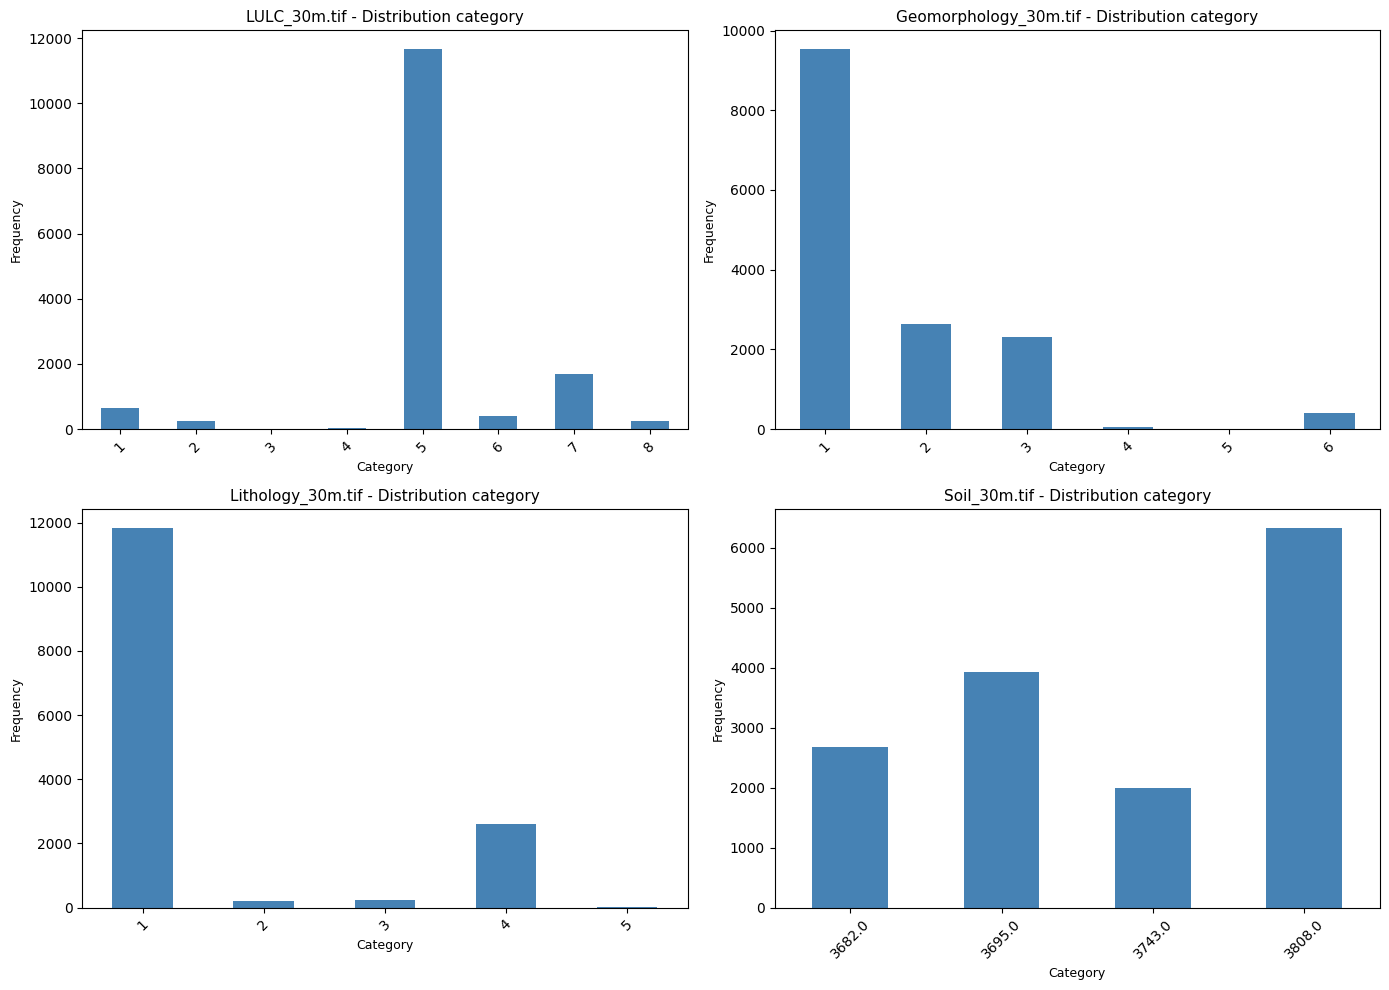

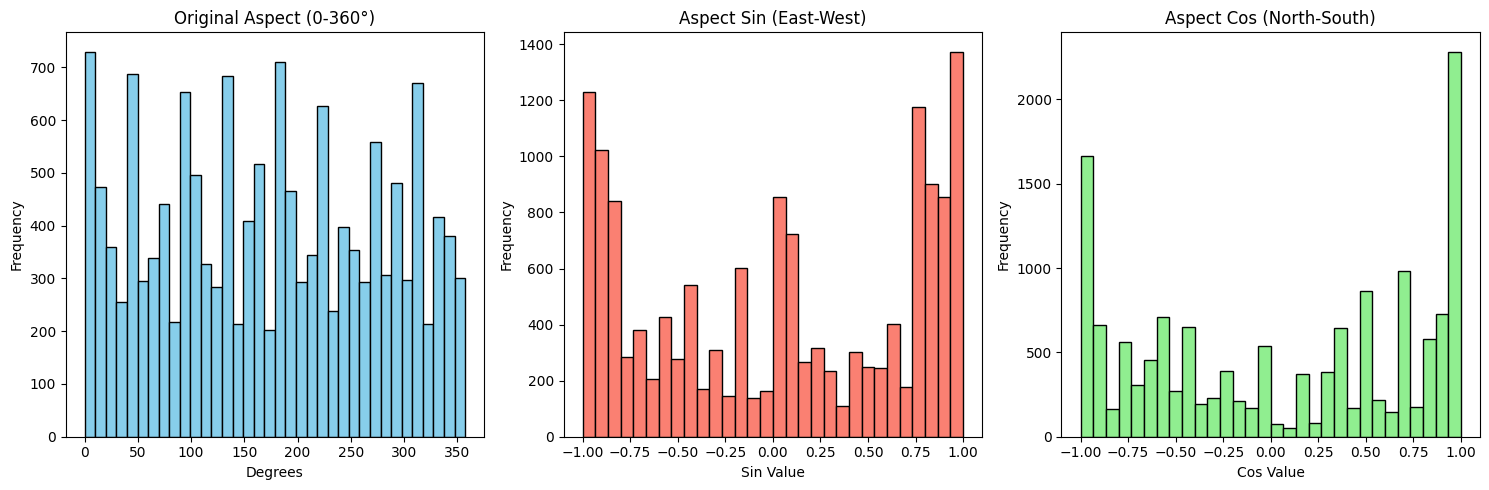

In [12]:
# VISUAL 
#Continuous features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(continuouos_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ax.hist(X_continuous[feature], bins=30, alpha=0.5, label='Original', color='blue')
    ax.hist(X_continuous_scaled[feature], bins=30, alpha=0.5, label='Normalized', color='orange')
    ax.set_title(f'{feature}', fontsize=9)
    ax.legend(fontsize=8)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.savefig('continuous_features_normalization.png', dpi=300, bbox_inches='tight')
print("\nSaved: continuous_features_normalization.png")

# Categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    value_counts = X_clean[feature].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'{feature} - Distribution category', fontsize=11)
    ax.set_xlabel('Category', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_features_distribution.png', dpi=300, bbox_inches='tight')
print("Saved: categorical_features_distribution.png")

# Circular features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original aspect
axes[0].hist(aspect_values, bins=36, color='skyblue', edgecolor='black')
axes[0].set_title('Original Aspect (0-360°)')
axes[0].set_xlabel('Degrees')
axes[0].set_ylabel('Frequency')

# Aspect Sin
axes[1].hist(X_circular['Aspect_sin'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Aspect Sin (East-West)')
axes[1].set_xlabel('Sin Value')
axes[1].set_ylabel('Frequency')

# Aspect Cos
axes[2].hist(X_circular['Aspect_cos'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Aspect Cos (North-South)')
axes[2].set_xlabel('Cos Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('aspect_circular_transformation.png', dpi=300, bbox_inches='tight')
print("Saved: aspect_circular_transformation.png")

In [13]:
#CORRELATION ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr
import warnings
warnings.filterwarnings('ignore')

# Load processed data
X_processed = pd.read_csv('data_processed_proper.csv')
y_clean = pd.read_csv('target_clean.csv')
X_continuous = pd.read_csv('data_continuous_normalized.csv')
X_categorical = pd.read_csv('data_categorical_encoded.csv')
X_circular = pd.read_csv('data_circular_transformed.csv')

print(f"\nDataset shape: {X_processed.shape}")
print(f"Target shape: {y_clean.shape}")


Dataset shape: (14930, 30)
Target shape: (14930, 1)


Slope_30m.tif <-> TWI_30m.tif: 1.000


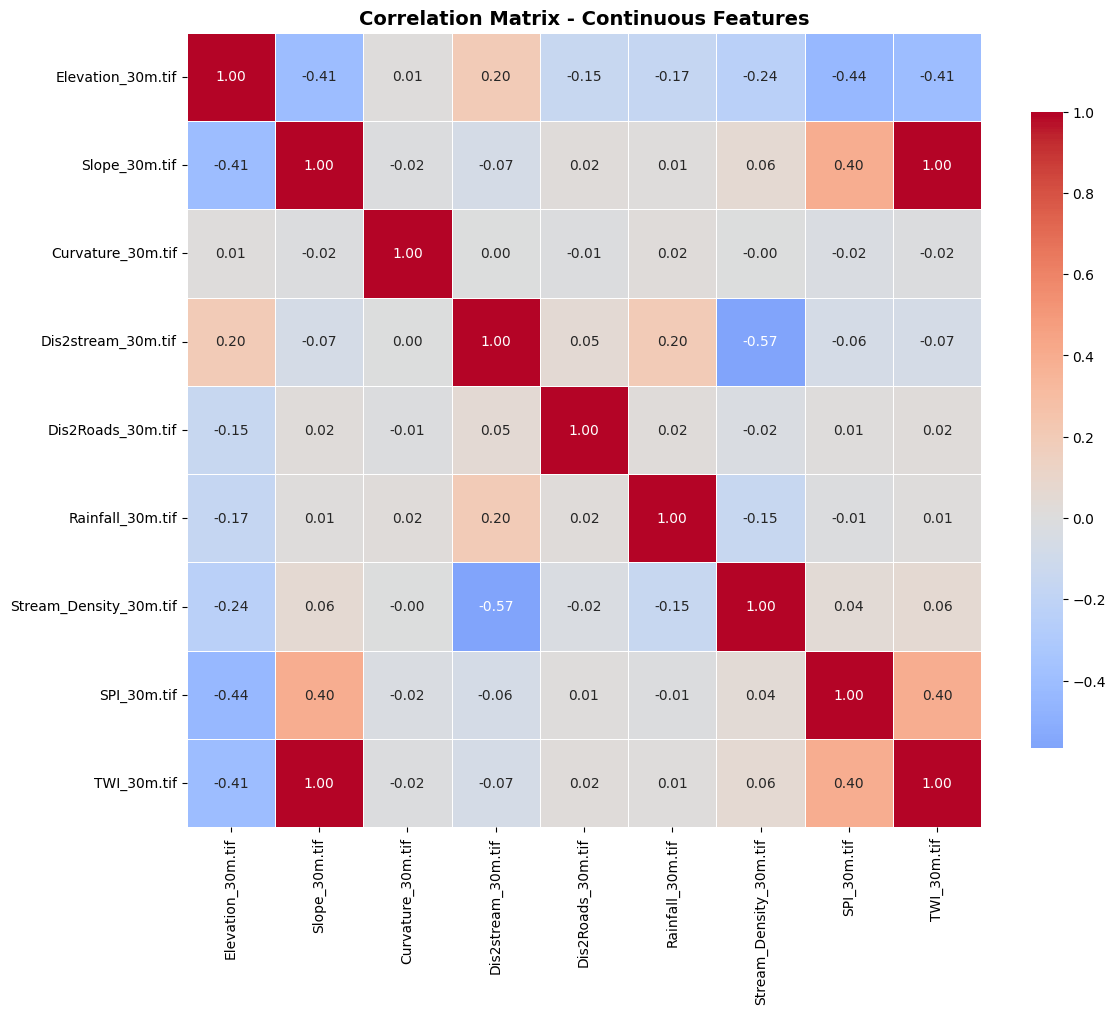

In [14]:
#PEARSON CORRELATION - Continuous Features
corr_matrix_continuous = X_continuous.corr()

high_corr_pairs = []
for i in range(len(corr_matrix_continuous.columns)):
    for j in range(i+1, len(corr_matrix_continuous.columns)):
        corr_value = corr_matrix_continuous.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = corr_matrix_continuous.columns[i]
            feature2 = corr_matrix_continuous.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))
            print(f"{feature1} <-> {feature2}: {corr_value:.3f}")

if len(high_corr_pairs) == 0:
    print("No highly correlated pairs found (threshold: 0.7)")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_continuous, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Continuous Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_continuous_features.png', dpi=300, bbox_inches='tight')



Top 15 Features Correlated with Target(Class):
                   correlation  p_value
Elevation_30m.tif      -0.2448      0.0

Bottom 15 Features (Least Correlated with Target):

Top 15 Features Correlated with Target(Class):
                   correlation  p_value
Elevation_30m.tif      -0.2448      0.0
Slope_30m.tif           0.0832      0.0

Bottom 15 Features (Least Correlated with Target):

Top 15 Features Correlated with Target(Class):
                   correlation  p_value
Elevation_30m.tif      -0.2448   0.0000
Slope_30m.tif           0.0832   0.0000
Curvature_30m.tif      -0.0074   0.3682

Bottom 15 Features (Least Correlated with Target):

Top 15 Features Correlated with Target(Class):
                    correlation  p_value
Elevation_30m.tif       -0.2448   0.0000
Slope_30m.tif            0.0832   0.0000
Dis2stream_30m.tif       0.0559   0.0000
Curvature_30m.tif       -0.0074   0.3682

Bottom 15 Features (Least Correlated with Target):

Top 15 Features Correlated with Ta

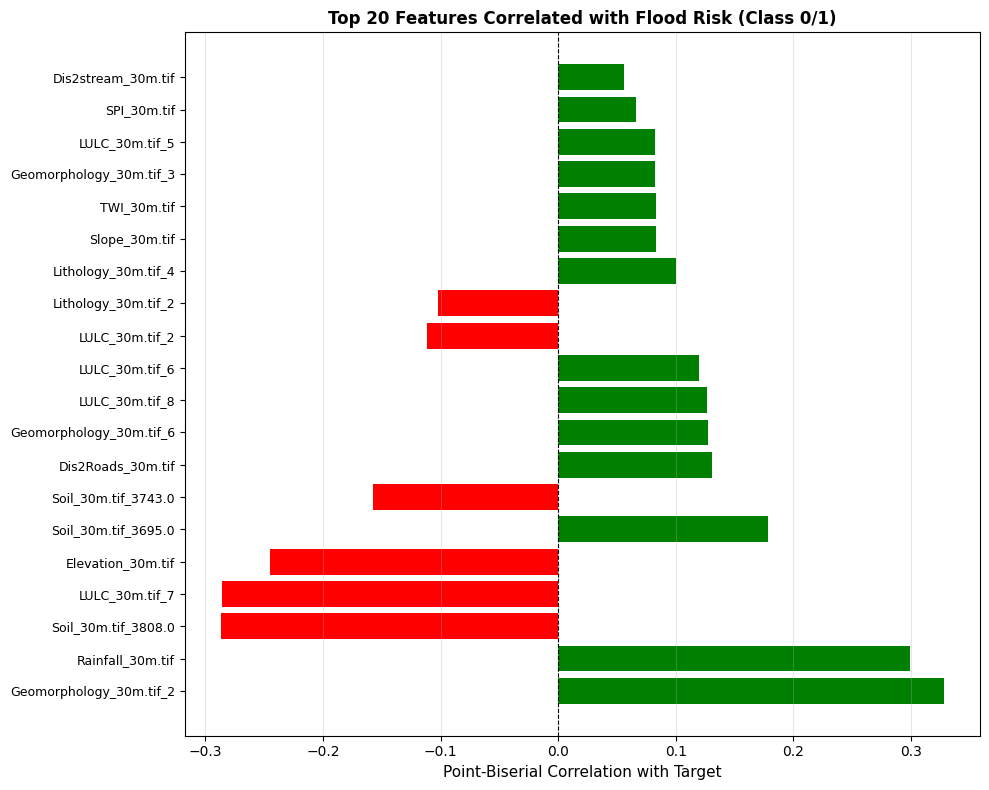

In [ ]:
#POINT-BISERIAL CORRELATION - Features vs Target (Class 0/1)

target = y_clean.values.ravel()

correlationz_with_target={}

for col in X_processed.columns:
    feature_values = X_processed[col].values
    corr, p_value = pointbiserialr(target, feature_values)
    correlationz_with_target[col] = {'correlation' : corr, 'p_value' : p_value}

    #convert to datagrame and sort

    corr_target_df = pd.DataFrame(correlationz_with_target).T
    corr_target_df = corr_target_df.sort_values('correlation', key=abs, ascending=False)

# Visualize top 20 correlations with target
top_20_features = corr_target_df.head(20)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in top_20_features['correlation']]
plt.barh(range(len(top_20_features)), top_20_features['correlation'], color=colors)
plt.yticks(range(len(top_20_features)), top_20_features.index, fontsize=9)
plt.xlabel('Point-Biserial Correlation with Target', fontsize=11)
plt.title('Top 20 Features Correlated with Flood Risk (Class 0/1)', 
          fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_with_target_top20.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: correlation_with_target_top20.png")